In [33]:
%reload_ext autoreload
%autoreload 2

In [185]:
from KNN import *
from LR import *

In [119]:
# take out the trash
import gc
import warnings
gc.collect()
warnings.filterwarnings('ignore')

# Python magic
%matplotlib inline

# Base packages
import gc, sys, re, os, math
from time import strptime, mktime

# Data processing/preprocessing/modeling packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)

# Sklearn: KNN, SVM, LR, RF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import *
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import *
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import GridSearchCV

In [120]:
X_train = pd.read_csv('../data/3/MultLabelTrainData.txt', delimiter='\s+', header=None)
y_train = pd.read_csv('../data/3/MultLabelTrainLabel.txt', delimiter='\t', header=None)
X_test = pd.read_csv('../data/3/MultLabelTrainData.txt', delimiter='\s+', header=None)

In [172]:
def testK(X_train, y_train, e):
    neighbors = np.arange(1,e)
    train_accuracy = np.empty(len(neighbors))
    for i,k in enumerate(neighbors):
        knn_ytest = KNeighborsClassifier(n_neighbors=k)
        knn_ytest.fit(X_train, y_train)
        train_accuracy[i] = knn_ytest.score(X_train, y_train)
    return neighbors, train_accuracy

def plotTestK(neighbors, train_accuracy, s):
    plt.figure(figsize=[20, 5])
    plt.plot(neighbors, train_accuracy, label='Training Accuracy')
    plt.legend()
    plt.xlabel('Number of Neighbors')
    plt.xticks(np.arange(0, neighbors[-1], step=s))
    plt.ylabel('Accuracy')
    plt.title('KNN Varying Number of Neighbors')
    plt.show()

In [174]:
def optimizeK(X_train, y_train, X_test, y_test, e):
    neighbors = np.arange(1,e)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    
    for i,k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_accuracy[i] = knn.score(X_train, y_train)
        test_accuracy[i] = knn.score(X_test, y_test)
    return neighbors, test_accuracy, train_accuracy

def plotK(neighbors, test_accuracy, train_accuracy, fs, s):
    plt.figure(figsize=fs)
    plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
    plt.plot(neighbors, train_accuracy, label='Training Accuracy')
    plt.legend()
    plt.xlabel('Number of Neighbors')
    plt.xticks(np.arange(0, neighbors[-1], step=s))
    plt.ylabel('Accuracy')
    plt.title('KNN Varying Number of Neighbors')
    plt.show() 

In [123]:
X_train.shape

(500, 103)

In [124]:
y_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,0,0,0,0,0


In [157]:
# Create single column train data
y_train1 = y_train[[0]]
y_train2 = y_train[[1]]
y_train3 = y_train[[2]]
y_train4 = y_train[[3]]
y_train5 = y_train[[4]]
y_train6 = y_train[[5]]
y_train7 = y_train[[6]]
y_train8 = y_train[[7]]
y_train9 = y_train[[8]]
y_train10 = y_train[[9]]
y_train11 = y_train[[10]]
y_train12 = y_train[[11]]
y_train13 = y_train[[12]]
y_train14 = y_train[[13]]

In [158]:
y_train1.head()

,0
0,0
1,0
2,0
3,0
4,0


In [159]:
y_train2.head()

,1
0,0
1,0
2,1
3,0
4,0


In [160]:
y_train12.head()

,11
0,1
1,0
2,1
3,0
4,0


In [128]:
y_train3.head()

,2
0,0
1,1
2,1
3,1
4,1


In [129]:
X_test.shape

(500, 103)

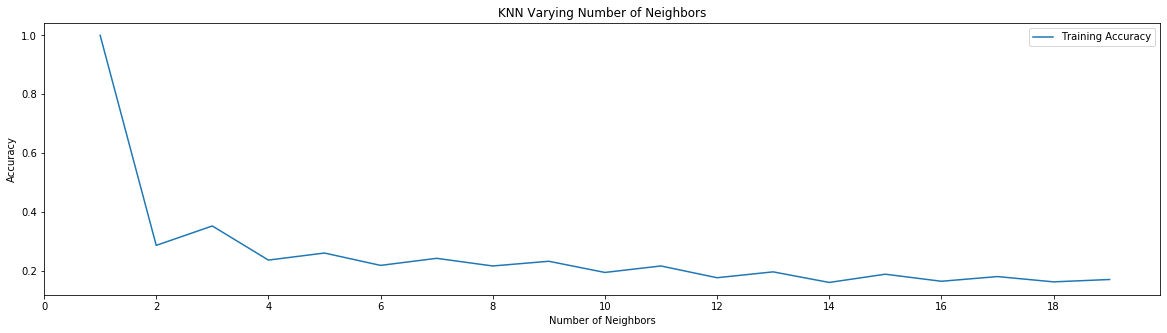

In [173]:
# Test k from 1 to 250
n_neighbors, train_accuracy = testK(X_train, y_train, 20)
plotTestK(n_neighbors, train_accuracy, 2)

In [175]:
# Train accuracy flattens out around k=150
y_test1 = getTestLabelsKNN(1, X_train, y_train1, X_test)
y_test2 = getTestLabelsKNN(1, X_train, y_train2, X_test)
y_test3 = getTestLabelsKNN(1, X_train, y_train3, X_test)
y_test4 = getTestLabelsKNN(1, X_train, y_train4, X_test)
y_test5 = getTestLabelsKNN(1, X_train, y_train5, X_test)
y_test6 = getTestLabelsKNN(1, X_train, y_train6, X_test)
y_test7 = getTestLabelsKNN(1, X_train, y_train7, X_test)
y_test8 = getTestLabelsKNN(1, X_train, y_train8, X_test)
y_test9 = getTestLabelsKNN(1, X_train, y_train9, X_test)
y_test10 = getTestLabelsKNN(1, X_train, y_train10, X_test)
y_test11 = getTestLabelsKNN(1, X_train, y_train11, X_test)
y_test12 = getTestLabelsKNN(1, X_train, y_train12, X_test)
y_test13 = getTestLabelsKNN(1, X_train, y_train13, X_test)
y_test14 = getTestLabelsKNN(1, X_train, y_train14, X_test)
y_test1 = pd.DataFrame(y_test1, columns=[0])
y_test2 = pd.DataFrame(y_test2, columns=[1])
y_test3 = pd.DataFrame(y_test3, columns=[2])
y_test4 = pd.DataFrame(y_test4, columns=[3])
y_test5 = pd.DataFrame(y_test5, columns=[4])
y_test6 = pd.DataFrame(y_test6, columns=[5])
y_test7 = pd.DataFrame(y_test7, columns=[6])
y_test8 = pd.DataFrame(y_test8, columns=[7])
y_test9 = pd.DataFrame(y_test9, columns=[8])
y_test10 = pd.DataFrame(y_test10, columns=[9])
y_test11 = pd.DataFrame(y_test11, columns=[10])
y_test12 = pd.DataFrame(y_test12, columns=[11])
y_test13 = pd.DataFrame(y_test13, columns=[12])
y_test14 = pd.DataFrame(y_test14, columns=[13])

In [176]:
# Combine all back into a single y_test
y_test = pd.concat([y_test1, y_test2, y_test3, y_test4, y_test5, y_test6, y_test7, y_test8, y_test9, y_test10, y_test11, y_test12, y_test13, y_test14], axis=1)
y_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,0,0,0,0,0


In [177]:
X_train.shape

(500, 103)

In [178]:
y_train.shape

(500, 14)

In [179]:
X_test.shape

(500, 103)

In [180]:
y_test.shape

(500, 14)

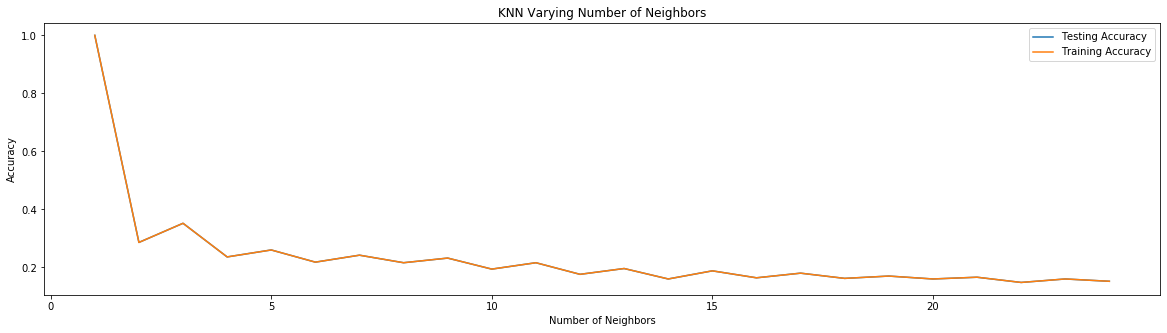

In [181]:
n1, test_acc1, train_acc1 = optimizeK(X_train, y_train, X_test, y_test, 25)
plotK(n1, test_acc1, train_acc1, [20, 5], 5)

In [183]:
n_neighbors2=1
knn_score, y_pred = runKNN(n_neighbors2, X_train, y_train, X_test, y_test)
print(f'Accuracy: {knn_score}')

Accuracy: 1.0


In [187]:
c2 = 10
lr_cma2, lr_cr2, lr_acc2, lr_y_pred2, ky2, val2 = runLogisticRegression(c2, X_train, y_train, X_test, y_test)

print(f'Logistic Regression Highest Accuracy Score, c={ky2}: {val2}\n')
print(f'Logistic Regression Most Accurate Confusion Matrix\n\n{lr_cma2[ky2]}\n')
pd.crosstab(y_test2, lr_y_pred2[ky2], rownames=['True'], colnames=['Predicted'], margins=True)

ValueError: bad input shape (500, 14)